# Payment Date Prediction 

In [4]:
pip install fast_ml


SyntaxError: invalid syntax (Temp/ipykernel_19172/1197292808.py, line 1)

In [5]:
pip install --upgrade google-api-python-client

Note: you may need to restart the kernel to use updated packages.



### Importing related Libraries 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [82]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import seaborn as sns
import plotly.express as px
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split

### Store the dataset into the Dataframe


In [83]:
df=pd.read_csv("/content/drive/MyDrive/dataset.csv")
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Check the shape of the dataframe


In [84]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [86]:
df.columns


Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [87]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [88]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [89]:
df.isnull().mean()*100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [90]:
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [91]:
df.duplicated(subset=['baseline_create_date','document_create_date','document_create_date.1']).value_counts()


True     44148
False     5852
dtype: int64

#### Please check, Column 'posting_id' is constant columns or not


In [92]:
from fast_ml.feature_selection import get_constant_features

constant_features = get_constant_features(df)
constant_features.head()

,Desc,Var,Value,Perc
0,Constant,posting_id,1.0,100.000
1,Constant,area_business,NaN,100.000
2,Quasi Constant,document type,RV,99.988


#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [93]:
constant_features = get_constant_features(df)
constant_features.head()

,Desc,Var,Value,Perc
0,Constant,posting_id,1.0,100.000
1,Constant,area_business,NaN,100.000
2,Quasi Constant,document type,RV,99.988


### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [94]:
df.drop(columns=['area_business','posting_id','invoice_id','document_create_date','isOpen','document type'], axis=1, inplace=True)


### Please check from the dataframe whether all the columns are removed or not 

In [95]:
df.head(10)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200126,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191128.0,USD,33133.29,20191113.0,NAH4
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20191004.0,CAD,22225.84,20190924.0,CA10
6,U001,0200769623,WAL-MAR in,2019-11-12 00:00:00,2019.0,1.930083e+09,2019-11-01,20191101,20191116.0,USD,7358.49,20191101.0,NAH4
7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,20200319,20200403.0,USD,11173.02,20200319.0,NAA8
8,U001,0200769623,WAL-MAR corp,2019-06-18 00:00:00,2019.0,1.929440e+09,2019-06-07,20190607,20190622.0,USD,15995.04,20190607.0,NAH4
9,U001,0200762301,C&S WH systems,2019-03-06 00:00:00,2019.0,1.928819e+09,2019-02-20,20190220,20190307.0,USD,28.63,20190220.0,NAC6


### Show all the Duplicate rows from the dataframe

In [96]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190228,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190818,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191204,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191112,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200414,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190725,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190113,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190529,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190522,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [97]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [98]:
df = df.drop_duplicates()

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [99]:
df.duplicated().sum()


0

### Check for the number of Rows and Columns in your dataset

In [100]:
df.shape

(48839, 13)

### Find out the total count of null values in each columns

In [101]:
df.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9681
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [102]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [103]:
print(df['clear_date'].dtypes,
df['posting_date'].dtypes,
df['due_in_date'].dtypes,
df['baseline_create_date'].dtypes)

object object float64 float64


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [104]:
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['document_create_date.1'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-30
4   2019-11-13
Name: document_create_date.1, dtype: datetime64[ns]

In [105]:
df['clear_date']=pd.to_datetime(df['clear_date'],format='%Y-%m-%d %H:%M:%S')
df['clear_date'].head()

0   2020-02-11
1   2019-08-08
2   2019-12-30
3          NaT
4   2019-11-25
Name: clear_date, dtype: datetime64[ns]

In [106]:
df['posting_date']=pd.to_datetime(df['posting_date'],format='%Y-%m-%d')
df['posting_date'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-30
4   2019-11-13
Name: posting_date, dtype: datetime64[ns]

In [107]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['due_in_date'].head()

0   2020-02-10
1   2019-08-11
2   2019-09-29
3   2020-04-10
4   2019-11-28
Name: due_in_date, dtype: datetime64[ns]

In [108]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['baseline_create_date'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-31
4   2019-11-13
Name: baseline_create_date, dtype: datetime64[ns]

### Please check the datatype of all the columns after conversion of the above 4 columns

In [109]:
df[['clear_date', 'posting_date', 'due_in_date','baseline_create_date']]

,clear_date,posting_date,due_in_date,baseline_create_date
0,2020-02-11,2020-01-26,2020-02-10,2020-01-26
1,2019-08-08,2019-07-22,2019-08-11,2019-07-22
2,2019-12-30,2019-09-14,2019-09-29,2019-09-14
3,NaT,2020-03-30,2020-04-10,2020-03-31
4,2019-11-25,2019-11-13,2019-11-28,2019-11-13
...,...,...,...,...
49995,NaT,2020-04-21,2020-05-06,2020-04-21
49996,2019-09-03,2019-08-15,2019-08-30,2019-08-15
49997,2020-03-05,2020-02-19,2020-03-05,2020-02-19
49998,2019-12-12,2019-11-27,2019-12-12,2019-11-27


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [110]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [111]:
df['total_open_amount'].head(10)

0    54273.28
1    79656.60
2     2253.86
3     3299.70
4    33133.29
5    22225.84
6     7358.49
7    11173.02
8    15995.04
9       28.63
Name: total_open_amount, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [112]:
df['converted_usd'] = np.where(df['invoice_currency']=='CAD', 0.7*df['total_open_amount'], df['total_open_amount'])
df.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,2253.860
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10,2309.790
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-09-20,2019-10-04,CAD,22225.84,2019-09-24,CA10,15558.088
6,U001,0200769623,WAL-MAR in,2019-11-12,2019.0,1.930083e+09,2019-11-01,2019-11-01,2019-11-16,USD,7358.49,2019-11-01,NAH4,7358.490
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-03-19,2020-04-03,USD,11173.02,2020-03-19,NAA8,11173.020
8,U001,0200769623,WAL-MAR corp,2019-06-18,2019.0,1.929440e+09,2019-06-07,2019-06-07,2019-06-22,USD,15995.04,2019-06-07,NAH4,15995.040
9,U001,0200762301,C&S WH systems,2019-03-06,2019.0,1.928819e+09,2019-02-20,2019-02-20,2019-03-07,USD,28.63,2019-02-20,NAC6,28.630


### Display the new "converted_usd" column values

In [113]:
df['converted_usd']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [114]:
df['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [115]:
df.drop(['invoice_currency', 'total_open_amount'], axis = 1, inplace = True) 

In [116]:
df.head(10)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088
6,U001,0200769623,WAL-MAR in,2019-11-12,2019.0,1.930083e+09,2019-11-01,2019-11-01,2019-11-16,2019-11-01,NAH4,7358.490
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020
8,U001,0200769623,WAL-MAR corp,2019-06-18,2019.0,1.929440e+09,2019-06-07,2019-06-07,2019-06-22,2019-06-07,NAH4,15995.040
9,U001,0200762301,C&S WH systems,2019-03-06,2019.0,1.928819e+09,2019-02-20,2019-02-20,2019-03-07,2019-02-20,NAC6,28.630


### Write a code to check the number of columns in dataframe

In [117]:
df.shape

(48839, 12)

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [118]:
df.columns[df.isnull().any()].tolist()


['clear_date']

In [119]:
df['clear_date']

0       2020-02-11
1       2019-08-08
2       2019-12-30
3              NaT
4       2019-11-25
           ...    
49995          NaT
49996   2019-09-03
49997   2020-03-05
49998   2019-12-12
49999   2019-01-15
Name: clear_date, Length: 48839, dtype: datetime64[ns]

#### Find out the number of null values from the column that you got from the above code

In [120]:
df['clear_date'].isnull().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [121]:
df1=df.loc[df['clear_date'].notnull()]
df2=df.loc[df['clear_date'].isnull()]

### Check the number of Rows and Columns for both the dataframes 

In [122]:
df1.shape

(39158, 12)

In [123]:
df2.shape

(9681, 12)

### Display the 5 records from maindata and nulldata dataframes

In [124]:
df1.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [125]:
df2.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [126]:
df1['Delay']=(df1['clear_date']-df1['due_in_date']).dt.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
df1.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61


In [128]:
df1.sort_values(by='document_create_date.1',inplace=True) # sorting in ascending order by document_create_date.1
df1

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay
30571,U001,0200794332,COST foundation,2019-01-23,2019.0,1.928523e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAAX,8041.59,9
3390,U001,0200769623,WAL-MAR us,2019-01-14,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,3408.73,0
26350,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,10318.00,-5
48624,U001,0200769623,WAL-MAR in,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,72181.59,-4
9633,U001,0200769623,WAL-MAR corporation,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,70483.35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12041,U001,0200900909,SYSCO co,2020-04-03,2020.0,1.930559e+09,2020-02-26,2020-02-26,2020-03-29,2020-02-26,NA32,44033.76,5
32335,U001,0200943275,US corp,2020-03-11,2020.0,1.930576e+09,2020-02-26,2020-02-26,2020-03-12,2020-02-26,NAA8,45445.78,-1
2874,U001,0200418007,AM associates,2020-03-19,2020.0,1.930568e+09,2020-02-27,2020-02-27,2020-03-13,2020-02-27,NAA8,10349.36,6
16955,U001,0200759878,SA corp,2020-03-13,2020.0,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,2020-02-27,NAH4,49290.19,0


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [129]:
avg_delay=df1.groupby('name_customer')['Delay'].mean(numeric_only=False)

In [130]:
print(avg_delay)

name_customer
11078 us                17.0
17135 associates       -10.0
17135 llc               -3.0
236008 associates       -3.0
99 CE                    2.0
                        ... 
YEN BROS corp            0.0
YEN BROS corporation    -0.5
YEN BROS llc            -2.0
ZARCO co                -1.0
ZIYAD  us                6.0
Name: Delay, Length: 3889, dtype: float64


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [131]:
df1['avg_delay']= df1['name_customer'].map(avg_delay)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
df1.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
30571,U001,0200794332,COST foundation,2019-01-23,2019.0,1.928523e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAAX,8041.59,9,-0.178947
3390,U001,0200769623,WAL-MAR us,2019-01-14,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,3408.73,0,-2.251825
26350,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,10318.00,-5,-2.317047
48624,U001,0200769623,WAL-MAR in,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,72181.59,-4,-2.519774
9633,U001,0200769623,WAL-MAR corporation,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,70483.35,1,-2.534104
37703,U001,0200769623,WAL-MAR in,2019-01-11,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,43689.83,-3,-2.519774
21115,U001,0200704858,WAKE foundation,2019-01-22,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAA8,18420.49,8,-5.043478
48622,U001,0200726979,BJ'S systems,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAA8,131.10,1,0.944785
33779,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,580.67,-5,-2.376412
11157,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,13904.40,-5,-2.124719


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [133]:
df1['avg_delay']=pd.to_timedelta(df1['avg_delay']).view(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Display the maindata dataframe 

In [134]:
df1.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
30571,U001,0200794332,COST foundation,2019-01-23,2019.0,1.928523e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAAX,8041.59,9,0
3390,U001,0200769623,WAL-MAR us,2019-01-14,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,3408.73,0,-2
26350,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,10318.00,-5,-2
48624,U001,0200769623,WAL-MAR in,2019-01-10,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,72181.59,-4,-2
9633,U001,0200769623,WAL-MAR corporation,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,70483.35,1,-2
37703,U001,0200769623,WAL-MAR in,2019-01-11,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,43689.83,-3,-2
21115,U001,0200704858,WAKE foundation,2019-01-22,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAA8,18420.49,8,-5
48622,U001,0200726979,BJ'S systems,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAA8,131.10,1,0
33779,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,580.67,-5,-2
11157,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,13904.40,-5,-2


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [135]:
df1.drop(['Delay', 'clear_date'], axis = 1, inplace = True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [136]:
df1.head(10)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
30571,U001,0200794332,COST foundation,2019.0,1.928523e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAAX,8041.59,0
3390,U001,0200769623,WAL-MAR us,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,3408.73,-2
26350,U001,0200769623,WAL-MAR trust,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,10318.00,-2
48624,U001,0200769623,WAL-MAR in,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,72181.59,-2
9633,U001,0200769623,WAL-MAR corporation,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,70483.35,-2
37703,U001,0200769623,WAL-MAR in,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,43689.83,-2
21115,U001,0200704858,WAKE foundation,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAA8,18420.49,-5
48622,U001,0200726979,BJ'S systems,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAA8,131.10,0
33779,U001,0200769623,WAL-MAR systems,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,580.67,-2
11157,U001,0200769623,WAL-MAR,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,13904.40,-2


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [137]:
df1.head(10)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
30571,U001,0200794332,COST foundation,2019.0,1.928523e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAAX,8041.59,0
3390,U001,0200769623,WAL-MAR us,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,3408.73,-2
26350,U001,0200769623,WAL-MAR trust,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,10318.00,-2
48624,U001,0200769623,WAL-MAR in,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,72181.59,-2
9633,U001,0200769623,WAL-MAR corporation,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,70483.35,-2
37703,U001,0200769623,WAL-MAR in,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,43689.83,-2
21115,U001,0200704858,WAKE foundation,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAA8,18420.49,-5
48622,U001,0200726979,BJ'S systems,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAA8,131.10,0
33779,U001,0200769623,WAL-MAR systems,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,580.67,-2
11157,U001,0200769623,WAL-MAR,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4,13904.40,-2


In [138]:
x = df1.iloc[:, 0:10]
y = df1.iloc[:, -1]


In [139]:
x.head(10)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,baseline_create_date,cust_payment_terms
30571,U001,0200794332,COST foundation,2019.0,1.928523e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAAX
3390,U001,0200769623,WAL-MAR us,2019.0,1.928535e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4
26350,U001,0200769623,WAL-MAR trust,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4
48624,U001,0200769623,WAL-MAR in,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4
9633,U001,0200769623,WAL-MAR corporation,2019.0,1.928538e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4
37703,U001,0200769623,WAL-MAR in,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4
21115,U001,0200704858,WAKE foundation,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAA8
48622,U001,0200726979,BJ'S systems,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAA8
33779,U001,0200769623,WAL-MAR systems,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4
11157,U001,0200769623,WAL-MAR,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,NAH4


In [140]:
y.head(10)

30571    0
3390    -2
26350   -2
48624   -2
9633    -2
37703   -2
21115   -5
48622    0
33779   -2
11157   -2
Name: avg_delay, dtype: int64

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [141]:
x_train,x_loc_test,y_train,y_loc_test=train_test_split(x,y,test_size=0.4)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [142]:
print(x_train.shape,
x_loc_test.shape, 
y_train.shape,
y_loc_test.shape)

(23494, 10) (15664, 10) (23494,) (15664,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [143]:
x_test, x_val, y_test, y_val = train_test_split(x_loc_test, y_loc_test, test_size=0.5)

### Please check for the number of rows and columns of all the 4 dataframes 

In [144]:
print(x_test.shape, x_val.shape, y_test.shape, y_val.shape)

(7832, 10) (7832, 10) (7832,) (7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

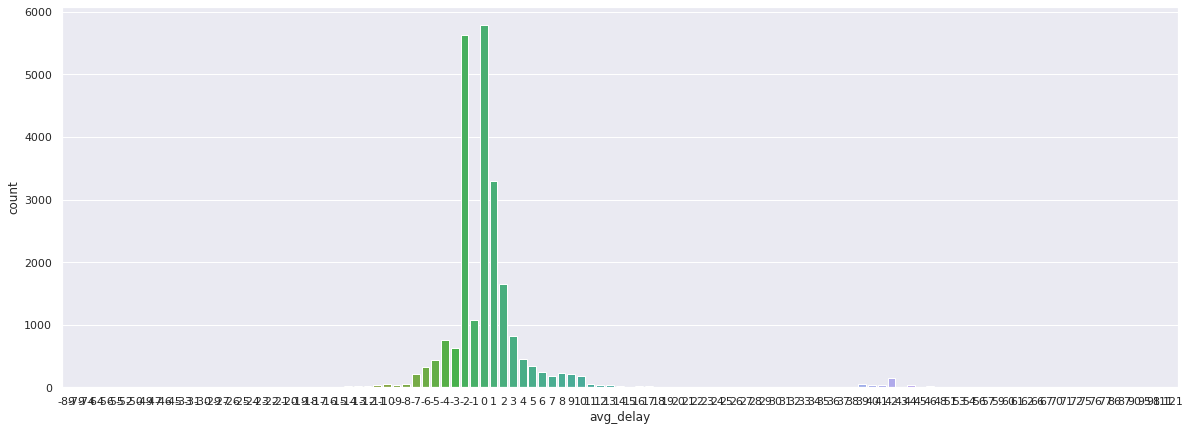

In [149]:
plt.subplots(figsize=(20,7))
sns.countplot(x=y_train)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [150]:
group=x_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

(array([2.1655e+04, 1.8330e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([1.92850176e+09, 2.68565159e+09, 3.44280143e+09, 4.19995127e+09,
        4.95710111e+09, 5.71425094e+09, 6.47140078e+09, 7.22855062e+09,
        7.98570046e+09, 8.74285030e+09, 9.50000013e+09]),
 <a list of 10 Patch objects>)

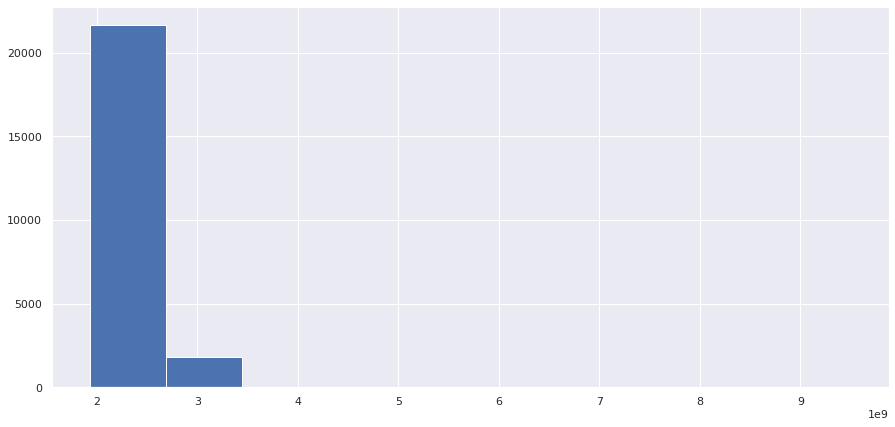

In [153]:
plt.subplots(figsize=(15,7))
plt.hist(x_train['doc_id'])

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


(array([20365.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3129.]),
 array([2019. , 2019.1, 2019.2, 2019.3, 2019.4, 2019.5, 2019.6, 2019.7,
        2019.8, 2019.9, 2020. ]),
 <a list of 10 Patch objects>)

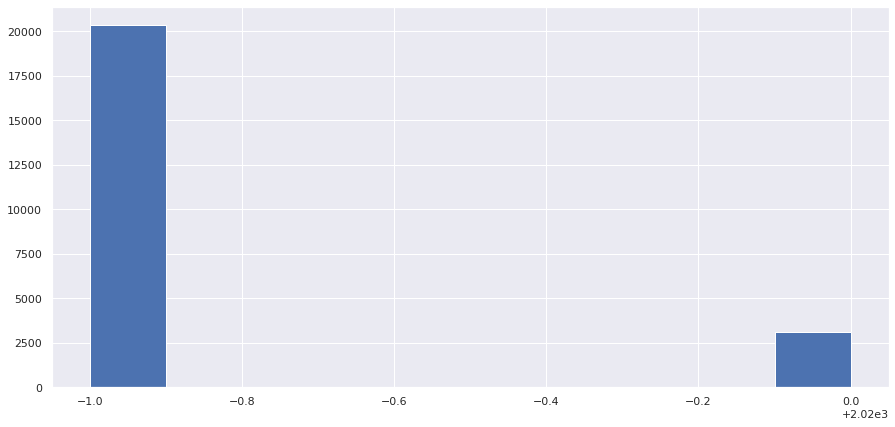

In [154]:
plt.subplots(figsize=(15,7))
plt.hist(x_train['buisness_year'])

(array([2.1655e+04, 1.8330e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([1.92850176e+09, 2.68565159e+09, 3.44280143e+09, 4.19995127e+09,
        4.95710111e+09, 5.71425094e+09, 6.47140078e+09, 7.22855062e+09,
        7.98570046e+09, 8.74285030e+09, 9.50000013e+09]),
 <a list of 10 Patch objects>)

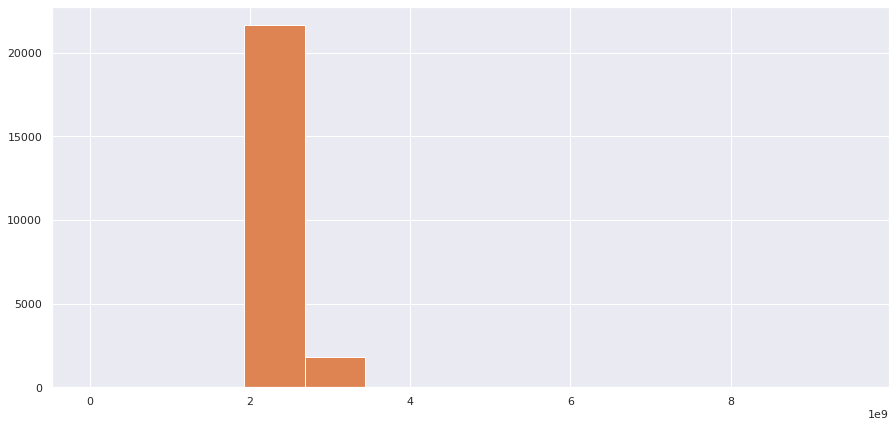

In [155]:
plt.subplots(figsize=(15,7))
plt.hist(x_train['buisness_year'])
plt.hist(x_train['doc_id'])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [156]:
x_train.head(10)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,baseline_create_date,cust_payment_terms
42238,U001,0200769623,WAL-MAR systems,2019.0,1.929974e+09,2019-10-05,2019-10-05,2019-10-20,2019-10-05,NAH4
23099,U001,0200726979,BJ'S systems,2019.0,1.929652e+09,2019-07-23,2019-07-23,2019-08-07,2019-07-23,NAA8
33727,U001,0200732755,KROGER corporation,2019.0,1.928587e+09,2019-01-09,2019-01-09,2019-01-24,2019-01-09,NAA8
20292,U001,0200762301,C&S WH corporation,2019.0,1.928955e+09,2019-03-15,2019-03-15,2019-03-30,2019-03-15,NAC6
24427,U001,0200729942,SA corp,2019.0,1.929159e+09,2019-04-16,2019-04-16,2019-05-01,2019-04-16,NAA8
23152,U001,0200769623,WAL-MAR llc,2020.0,1.930568e+09,2020-02-26,2020-02-26,2020-03-12,2020-02-26,NAH4
13721,CA02,0100030194,AMAZO llc,2019.0,2.960587e+09,2019-10-20,2019-10-20,2019-11-08,2019-10-29,CA10
16181,U001,0200769623,WAL-MAR trust,2019.0,1.930010e+09,2019-10-13,2019-10-13,2019-10-28,2019-10-13,NAH4
19123,U001,0200769623,WAL-MAR us,2019.0,1.928879e+09,2019-03-01,2019-03-01,2019-03-16,2019-03-01,NAH4
5124,U001,CCU013,KRAFT F us,2019.0,1.929647e+09,2019-07-27,2019-07-27,2019-07-27,2019-07-27,NAX2


In [157]:
x_train.describe()

,buisness_year,doc_id
count,23494.000000,2.349400e+04
mean,2019.133183,2.012957e+09
std,0.339780,3.011309e+08
min,2019.000000,1.928502e+09
25%,2019.000000,1.929178e+09
50%,2019.000000,1.929727e+09
75%,2019.000000,1.930209e+09
max,2020.000000,9.500000e+09


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [158]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(x_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [159]:
x_train['business_code_enc'] = business_coder.fit_transform(x_train['business_code'])

In [160]:
x_val['business_code_enc'] = business_coder.transform(x_val['business_code'])
x_test['business_code_enc'] = business_coder.transform(x_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [161]:
x_train[['business_code', 'business_code_enc']]

,business_code,business_code_enc
42238,U001,1
23099,U001,1
33727,U001,1
20292,U001,1
24427,U001,1
...,...,...
16028,U001,1
345,U001,1
12141,U001,1
23251,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [162]:
def custom(col ,traindf = x_train,valdf = x_val,testdf = x_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [163]:
x_train , x_val , x_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [164]:
x_train['cust_number'] = x_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
x_test['cust_number'] = x_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
x_val['cust_number'] = x_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [165]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [166]:
label_encoder = EncoderExt()
label_encoder.fit(x_train['name_customer'])
x_train['name_customer_enc']=label_encoder.transform(x_train['name_customer'])
x_val['name_customer_enc']=label_encoder.transform(x_val['name_customer'])
x_test['name_customer_enc']=label_encoder.transform(x_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [167]:
x_train ,x_val, x_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [168]:
label_encoder1 = EncoderExt()
label_encoder1.fit(x_train['cust_payment_terms'])
x_train['cust_payment_terms_enc']=label_encoder1.transform(x_train['cust_payment_terms'])
x_val['cust_payment_terms_enc']=label_encoder1.transform(x_val['cust_payment_terms'])
x_test['cust_payment_terms_enc']=label_encoder1.transform(x_test['cust_payment_terms'])

In [169]:
x_train ,x_val, x_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [170]:
x_train.dtypes


cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [171]:
x_test.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [172]:
x_val.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [173]:
x_train['posting_date'] = pd.to_datetime(x_train['posting_date'], errors='coerce')
x_val['posting_date']= pd.to_datetime(x_val['posting_date'], errors='coerce')
x_test['posting_date']= pd.to_datetime(x_test['posting_date'], errors='coerce')


In [174]:
x_train['day_of_postingdate'] = x_train['posting_date'].dt.day
x_train['month_of_postingdate'] = x_train['posting_date'].dt.month
x_train['year_of_postingdate'] = x_train['posting_date'].dt.year

x_val['day_of_postingdate'] = x_val['posting_date'].dt.day
x_val['month_of_postingdate'] = x_val['posting_date'].dt.month
x_val['year_of_postingdate'] = x_val['posting_date'].dt.year


x_test['day_of_postingdate'] = x_test['posting_date'].dt.day
x_test['month_of_postingdate'] = x_test['posting_date'].dt.month
x_test['year_of_postingdate'] = x_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [175]:
x_train ,x_val, x_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [176]:
x_train['baseline_create_date'] = pd.to_datetime(x_train['baseline_create_date'], errors='coerce')
x_val['baseline_create_date']= pd.to_datetime(x_val['baseline_create_date'], errors='coerce')
x_test['baseline_create_date']= pd.to_datetime(x_test['baseline_create_date'], errors='coerce')

In [177]:
x_train['day_of_createdate'] = x_train['baseline_create_date'].dt.day
x_train['month_of_createdate'] = x_train['baseline_create_date'].dt.month
x_train['year_of_createdate'] = x_train['baseline_create_date'].dt.year

x_val['day_of_createdate'] = x_val['baseline_create_date'].dt.day
x_val['month_of_createdate'] = x_val['baseline_create_date'].dt.month
x_val['year_of_createdate'] = x_val['baseline_create_date'].dt.year


x_test['day_of_createdate'] = x_test['baseline_create_date'].dt.day
x_test['month_of_createdate'] = x_test['baseline_create_date'].dt.month
x_test['year_of_createdate'] = x_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [178]:
x_train ,x_val, x_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [179]:
x_train['due_in_date'] = pd.to_datetime(x_train['due_in_date'], errors='coerce')
x_val['due_in_date']= pd.to_datetime(x_val['due_in_date'], errors='coerce')
x_test['due_in_date']= pd.to_datetime(x_test['due_in_date'], errors='coerce')

In [180]:
x_train['day_of_due'] = x_train['due_in_date'].dt.day
x_train['month_of_due'] = x_train['due_in_date'].dt.month
x_train['year_of_due'] = x_train['due_in_date'].dt.year

x_val['day_of_due'] = x_val['due_in_date'].dt.day
x_val['month_of_due'] = x_val['due_in_date'].dt.month
x_val['year_of_due'] = x_val['due_in_date'].dt.year


x_test['day_of_due'] = x_test['due_in_date'].dt.day
x_test['month_of_due'] = x_test['due_in_date'].dt.month
x_test['year_of_due'] = x_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [181]:
x_train ,x_val, x_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [185]:
x_train.drop(['document_create_date.1'], axis = 1, inplace = True) 
x_test.drop(['document_create_date.1'], axis = 1, inplace = True) 
x_val.drop(['document_create_date.1'], axis = 1, inplace = True) 

In [186]:
x_train.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [187]:
x_test.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [188]:
x_val.dtypes

cust_number                 int64
buisness_year             float64
doc_id                    float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [189]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)
len(x_train.columns[constant_filter.get_support()])

15

- Note - Keep the code as it is, no need to change 


In [190]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [191]:
x_train_T = x_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [192]:
def handling_correlation(x_train,threshold=0.8):
    corr_features = set()
    corr_matrix = x_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [193]:
train=x_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_createdate',
 'year_of_postingdate',
 'month_of_createdate',
 'month_of_due',
 'day_of_createdate',
 'year_of_due']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

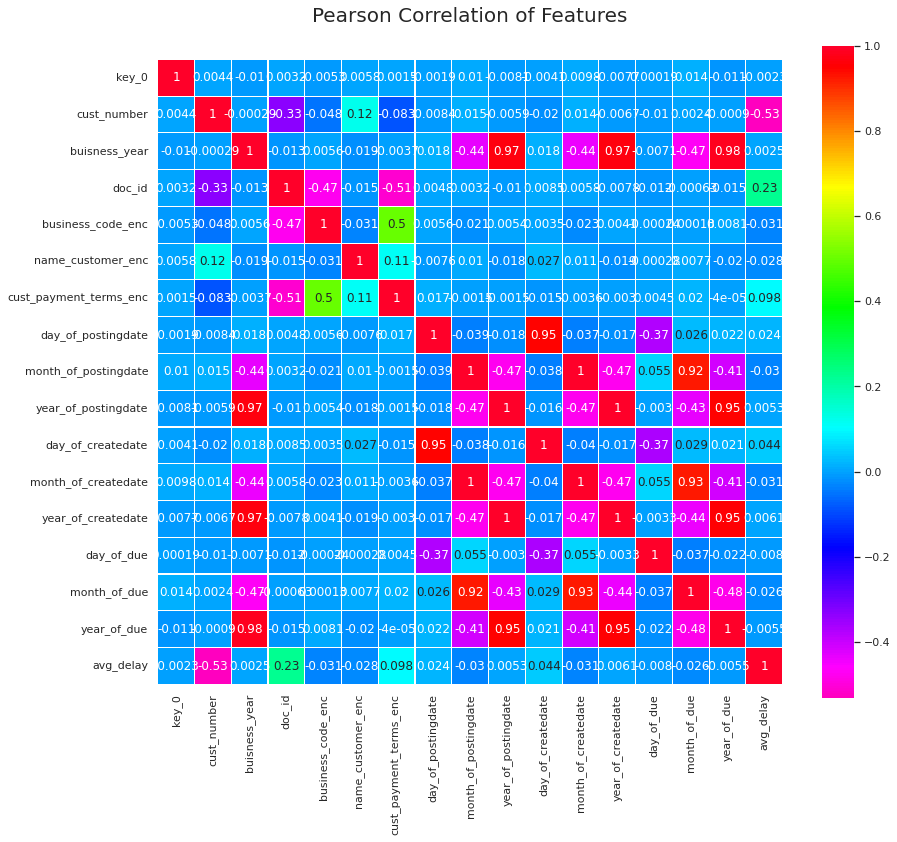

In [194]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [195]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(x_train)

VarianceThreshold(threshold=0.8)

In [196]:
sel.variances_

array([1.75157575e+15, 1.15445245e-01, 9.06759581e+16, 2.92946739e-01,
       1.06311724e+06, 1.26561518e+02, 7.54295555e+01, 1.22183146e+01,
       1.15522175e-01, 7.68153069e+01, 1.22340788e+01, 1.15713229e-01,
       7.68027380e+01, 1.20552524e+01, 1.18449651e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [197]:
MSE_Score = []
R2_Score = []
Algorithm = []
Accuracy = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [198]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(x_train, y_train)
predicted= regressor.predict(x_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [199]:
MSE_Score.append(round(sm.mean_squared_error(y_test, predicted), 2)) 
R2_Score.append(round(sm.r2_score(y_test, predicted), 2))
Accuracy.append(regressor.score(x_test, y_test))

### Check the same for the Validation set also 

In [200]:
predict_test= regressor.predict(x_val)
mean_squared_error(y_val, predict_test, squared=False)

5.971568143144752

### Display The Comparison Lists

In [202]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[38.39],[0.34],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [203]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regressor')
regressor = SVR()
regressor.fit(x_train, y_train)
predicted= regressor.predict(x_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [204]:
MSE_Score.append(round(sm.mean_squared_error(y_test, predicted), 2)) 
R2_Score.append(round(sm.r2_score(y_test, predicted), 2))
Accuracy.append(regressor.score(x_test, y_test))

### Check the same for the Validation set also 

In [205]:
predict_test= regressor.predict(x_val)
mean_squared_error(y_val, predict_test, squared=False)

6.724199026992175

### Display The Comparison Lists

In [206]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor'],[38.39, 48.15],[0.34, 0.17],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [207]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regressor')
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
predicted= regressor.predict(x_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [208]:
MSE_Score.append(round(sm.mean_squared_error(y_test, predicted), 2)) 
R2_Score.append(round(sm.r2_score(y_test, predicted), 2))
Accuracy.append(regressor.score(x_test, y_test))

### Check the same for the Validation set also 

In [209]:
predict_test= regressor.predict(x_val)
mean_squared_error(y_val, predict_test, squared=False)

5.0075530285773615

### Display The Comparison Lists

In [210]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor', 'Decision Tree Regressor'],[38.39, 48.15, 29.44],[0.34, 0.17, 0.49],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [211]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)
predicted= regressor.predict(x_test)


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [212]:
MSE_Score.append(round(sm.mean_squared_error(y_test, predicted), 2)) 
R2_Score.append(round(sm.r2_score(y_test, predicted), 2))
Accuracy.append(regressor.score(x_test, y_test))

### Check the same for the Validation set also 

In [213]:
predict_test= regressor.predict(x_val)
mean_squared_error(y_val, predict_test, squared=False)

3.3414069848503245

### Display The Comparison Lists


In [214]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor'],[38.39, 48.15, 29.44, 17.05],[0.34, 0.17, 0.49, 0.7],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [215]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(x_train, y_train)
predicted = regressor.predict(x_test)

[05:42:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [216]:
MSE_Score.append(round(sm.mean_squared_error(y_test, predicted), 2)) 
R2_Score.append(round(sm.r2_score(y_test, predicted), 2))
Accuracy.append(regressor.score(x_test, y_test))

### Check the same for the Validation set also 

In [217]:
predict_test= regressor.predict(x_val)
mean_squared_error(y_val, predict_test, squared=False)

3.8877525547635443

### Display The Comparison Lists


In [218]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor'],[38.39, 48.15, 29.44, 17.05, 18.5],[0.34, 0.17, 0.49, 0.7, 0.68],

## You need to make the comparison list into a comparison dataframe 

In [219]:
comparison= pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score, Accuracy)),columns=['Algorithms', 'MSE_Score', 'R2_Score', 'Accuracy'])
comparison


,Algorithms,MSE_Score,R2_Score,Accuracy
0,LinearRegression,38.39,0.34,0.335517
1,Support Vector Regressor,48.15,0.17,0.166629
2,Decision Tree Regressor,29.44,0.49,0.490440
3,Random Forest Regressor,17.05,0.70,0.704819
4,XGB Regressor,18.50,0.68,0.679727


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [220]:
regressorfinal = RandomForestRegressor()
regressorfinal.fit(x_train, y_train)
predictedfinal = regressorfinal.predict(x_test)
predict_testfinal = regressorfinal.predict(x_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [222]:
round(sm.mean_squared_error(y_test,predictedfinal), 2)

16.51

### Calculate the mean Square Error for validation dataset

In [223]:
mean_squared_error(y_val,predict_testfinal,squared=False)

3.301550528345057

### Calculate the R2 score for test

In [224]:
r2_score(y_test, predictedfinal)

0.7142170690669872

### Calculate the R2 score for Validation

In [225]:
r2_score(y_val, predict_testfinal)

0.8005934719407636

### Calculate the Accuracy for train Dataset 

In [226]:
regressorfinal.score(x_train, y_train)

0.9738960648858854

### Calculate the accuracy for validation

In [227]:
regressorfinal.score(x_test, y_test)

0.7142170690669872

### Calculate the accuracy for test

In [228]:
regressorfinal.score(x_val, y_val)

0.8005934719407636

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

I have choosed Random Forest Regressor as the accuracy for train,test and validation dataset was high compared to other models.

**Hyperparameter Tuning**





In [231]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [232]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = regressorfinal,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [234]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [235]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=40, min_samples_split=6)

In [255]:
x_val

,cust_number,buisness_year,doc_id,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
35916,200769623,2019.0,1.930173e+09,1,2982,34,21,11,2019,21,11,2019,6,12,2019
6482,200434439,2020.0,1.930495e+09,1,252,14,6,2,2020,6,2,2020,9,3,2020
28422,200769623,2019.0,1.929850e+09,1,2985,34,10,9,2019,10,9,2019,25,9,2019
41698,200782001,2019.0,1.929139e+09,1,1118,14,17,4,2019,17,4,2019,19,5,2019
31278,102,2019.0,1.929447e+09,1,1514,32,7,6,2019,7,6,2019,12,7,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,200748108,2019.0,1.929928e+09,1,1575,21,26,9,2019,26,9,2019,11,10,2019
7965,200143162,2019.0,1.930132e+09,1,2906,21,9,11,2019,9,11,2019,24,11,2019
33321,200794332,2019.0,1.928739e+09,1,609,23,5,2,2019,5,2,2019,20,2,2019
10496,140104423,2019.0,2.960597e+09,0,1856,5,2,12,2019,5,12,2019,15,12,2019


In [236]:
regressorfinal1 = RandomForestRegressor(max_depth=40, min_samples_split=6)
regressorfinal1.fit(x_train,y_train)
predictedfinal1 = regressorfinal1.predict(x_val)

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [237]:
df2

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [238]:
df2.shape

(9681, 12)

### Check the Description and Information of the nulldata 

In [239]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           9681 non-null   object        
 1   cust_number             9681 non-null   object        
 2   name_customer           9681 non-null   object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           9681 non-null   float64       
 5   doc_id                  9681 non-null   float64       
 6   posting_date            9681 non-null   datetime64[ns]
 7   document_create_date.1  9681 non-null   datetime64[ns]
 8   due_in_date             9681 non-null   datetime64[ns]
 9   baseline_create_date    9681 non-null   datetime64[ns]
 10  cust_payment_terms      9681 non-null   object        
 11  converted_usd           9681 non-null   float64       
dtypes: datetime64[ns](5), float64(3), object(4)
mem

In [240]:
df2.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


### Storing the Nulldata into a different dataset 
# for BACKUP

In [241]:
nulldata1=df2 


### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [242]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(df2['business_code'])
df2['business_code_enc'] = business_codern.transform(df2['business_code'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [243]:
df2['cust_number'] = df2['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [244]:
df2['clear_date']= pd.to_datetime(df2['clear_date'], errors='coerce')
df2['posting_date']= pd.to_datetime(df2['posting_date'], errors='coerce')
df2['due_in_date']= pd.to_datetime(df2['due_in_date'], errors='coerce')
df2['baseline_create_date']= pd.to_datetime(df2['baseline_create_date'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [245]:
df2['day_of_cleardate']=df2['clear_date'].dt.day
df2['month_of_cleardate']=df2['clear_date'].dt.month
df2['year_of_cleardate']=df2['clear_date'].dt.year

df2['day_of_postingdate']=df2['posting_date'].dt.day
df2['month_of_postingdate']=df2['posting_date'].dt.month
df2['year_of_postingdate']=df2['posting_date'].dt.year

df2['day_of_due']=df2['due_in_date'].dt.day
df2['month_of_due']=df2['due_in_date'].dt.month
df2['year_of_due']=df2['due_in_date'].dt.year

df2['day_of_createdate']=df2['baseline_create_date'].dt.day
df2['month_of_createdate']=df2['baseline_create_date'].dt.month
df2['year_of_createdate']=df2['baseline_create_date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [246]:
df2['cust_payment_terms_enc']=label_encoder1.transform(df2['cust_payment_terms'])
df2['business_code_enc']=label_encoder1.transform(df2['business_code'])
df2['name_customer_enc']=label_encoder.transform(df2['name_customer'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Check for the datatypes of all the columns of Nulldata

In [247]:
df2.dtypes

business_code                     object
cust_number                        int64
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createda

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [248]:
df2.drop(['business_code', 'baseline_create_date', 'due_in_date', 'posting_date', 'name_customer', 'clear_date', 'cust_payment_terms','day_of_cleardate','month_of_cleardate', 'year_of_cleardate'], axis = 1, inplace = True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Check the information of the "nulldata" dataframe

In [249]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             9681 non-null   int64         
 1   buisness_year           9681 non-null   float64       
 2   doc_id                  9681 non-null   float64       
 3   document_create_date.1  9681 non-null   datetime64[ns]
 4   converted_usd           9681 non-null   float64       
 5   business_code_enc       9681 non-null   int64         
 6   day_of_postingdate      9681 non-null   int64         
 7   month_of_postingdate    9681 non-null   int64         
 8   year_of_postingdate     9681 non-null   int64         
 9   day_of_due              9681 non-null   int64         
 10  month_of_due            9681 non-null   int64         
 11  year_of_due             9681 non-null   int64         
 12  day_of_createdate       9681 non-null   int64  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [250]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 9636 to 231
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int64  
 1   buisness_year           7832 non-null   float64
 2   doc_id                  7832 non-null   float64
 3   business_code_enc       7832 non-null   int64  
 4   name_customer_enc       7832 non-null   int64  
 5   cust_payment_terms_enc  7832 non-null   int64  
 6   day_of_postingdate      7832 non-null   int64  
 7   month_of_postingdate    7832 non-null   int64  
 8   year_of_postingdate     7832 non-null   int64  
 9   day_of_createdate       7832 non-null   int64  
 10  month_of_createdate     7832 non-null   int64  
 11  year_of_createdate      7832 non-null   int64  
 12  day_of_due              7832 non-null   int64  
 13  month_of_due            7832 non-null   int64  
 14  year_of_due             7832 non-null 

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [251]:
x_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'business_code_enc',
       'name_customer_enc', 'cust_payment_terms_enc', 'day_of_postingdate',
       'month_of_postingdate', 'year_of_postingdate', 'day_of_createdate',
       'month_of_createdate', 'year_of_createdate', 'day_of_due',
       'month_of_due', 'year_of_due'],
      dtype='object')

In [252]:
df2.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'document_create_date.1',
       'converted_usd', 'business_code_enc', 'day_of_postingdate',
       'month_of_postingdate', 'year_of_postingdate', 'day_of_due',
       'month_of_due', 'year_of_due', 'day_of_createdate',
       'month_of_createdate', 'year_of_createdate', 'cust_payment_terms_enc',
       'name_customer_enc'],
      dtype='object')

In [258]:
nulldata2=df2[['cust_number', 'buisness_year', 'doc_id',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [259]:
nulldata2.head(10)

,cust_number,buisness_year,doc_id,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,65,2697,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,65,2784,21,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,65,89,21,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,65,2008,21,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,65,709,36,23,4,2020,16,4,2020,26,4,2020
22,200744019,2020.0,1.930676e+09,65,2775,21,21,3,2020,21,3,2020,5,4,2020
25,140106408,2020.0,2.960619e+09,65,2968,5,6,3,2020,6,3,2020,16,3,2020
27,200337148,2020.0,1.930592e+09,65,543,21,2,3,2020,2,3,2020,17,3,2020
35,200794332,2020.0,1.930731e+09,65,605,23,7,4,2020,7,4,2020,22,4,2020
37,200794332,2020.0,1.930804e+09,65,611,23,23,4,2020,23,4,2020,8,5,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [262]:
final_result= regressorfinal1.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [263]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [264]:
final_result.head(10)

0     1.408369
1    19.194048
2    -2.769611
3     3.350909
4    -7.992714
5    10.876944
6     8.980000
7     1.722337
8    -0.571762
9    -1.305302
Name: avg_delay, dtype: float64

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [265]:
df2 = df2[df2.index.notnull()]

In [266]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = df2.index )

### Display the "Final" dataframe 

In [267]:
Final.head(10)

,key_0,cust_number,buisness_year,doc_id,document_create_date.1,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,cust_payment_terms_enc,name_customer_enc,avg_delay
0,3,140105686,2020.0,2.960623e+09,2020-03-30,2309.790,65,30,3,2020,10,4,2020,31,3,2020,5,2697,1.408369
1,7,200744019,2020.0,1.930659e+09,2020-03-19,11173.020,65,19,3,2020,3,4,2020,19,3,2020,21,2784,19.194048
2,10,200418007,2020.0,1.930611e+09,2020-03-11,3525.590,65,11,3,2020,26,3,2020,11,3,2020,21,89,-2.769611
3,14,200739534,2020.0,1.930788e+09,2020-04-15,121105.650,65,15,4,2020,30,4,2020,15,4,2020,21,2008,3.350909
4,15,200353024,2020.0,1.930817e+09,2020-04-23,3726.060,65,23,4,2020,26,4,2020,16,4,2020,36,709,-7.992714
5,22,200744019,2020.0,1.930676e+09,2020-03-21,5893.010,65,21,3,2020,5,4,2020,21,3,2020,21,2775,10.876944
6,25,140106408,2020.0,2.960619e+09,2020-03-06,64982.589,65,6,3,2020,16,3,2020,6,3,2020,5,2968,8.980000
7,27,200337148,2020.0,1.930592e+09,2020-03-02,11380.830,65,2,3,2020,17,3,2020,2,3,2020,21,543,1.722337
8,35,200794332,2020.0,1.930731e+09,2020-04-07,3863.930,65,7,4,2020,22,4,2020,7,4,2020,23,605,-0.571762
9,37,200794332,2020.0,1.930804e+09,2020-04-23,74453.010,65,23,4,2020,8,5,2020,23,4,2020,23,611,-1.305302


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [268]:
Final.shape

(9681, 19)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [269]:
cols=["day_of_due","month_of_due","year_of_due"]
Final['due_in_date'] = Final[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [270]:
Final.head(10)

,key_0,cust_number,buisness_year,doc_id,document_create_date.1,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,cust_payment_terms_enc,name_customer_enc,avg_delay,due_in_date
0,3,140105686,2020.0,2.960623e+09,2020-03-30,2309.790,65,30,3,2020,10,4,2020,31,3,2020,5,2697,1.408369,10-4-2020
1,7,200744019,2020.0,1.930659e+09,2020-03-19,11173.020,65,19,3,2020,3,4,2020,19,3,2020,21,2784,19.194048,3-4-2020
2,10,200418007,2020.0,1.930611e+09,2020-03-11,3525.590,65,11,3,2020,26,3,2020,11,3,2020,21,89,-2.769611,26-3-2020
3,14,200739534,2020.0,1.930788e+09,2020-04-15,121105.650,65,15,4,2020,30,4,2020,15,4,2020,21,2008,3.350909,30-4-2020
4,15,200353024,2020.0,1.930817e+09,2020-04-23,3726.060,65,23,4,2020,26,4,2020,16,4,2020,36,709,-7.992714,26-4-2020
5,22,200744019,2020.0,1.930676e+09,2020-03-21,5893.010,65,21,3,2020,5,4,2020,21,3,2020,21,2775,10.876944,5-4-2020
6,25,140106408,2020.0,2.960619e+09,2020-03-06,64982.589,65,6,3,2020,16,3,2020,6,3,2020,5,2968,8.980000,16-3-2020
7,27,200337148,2020.0,1.930592e+09,2020-03-02,11380.830,65,2,3,2020,17,3,2020,2,3,2020,21,543,1.722337,17-3-2020
8,35,200794332,2020.0,1.930731e+09,2020-04-07,3863.930,65,7,4,2020,22,4,2020,7,4,2020,23,605,-0.571762,22-4-2020
9,37,200794332,2020.0,1.930804e+09,2020-04-23,74453.010,65,23,4,2020,8,5,2020,23,4,2020,23,611,-1.305302,8-5-2020


In [271]:
Final.dtypes

key_0                              int64
cust_number                        int64
buisness_year                    float64
doc_id                           float64
document_create_date.1    datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_terms_enc             int64
name_customer_enc                  int64
avg_delay                        float64
due_in_date                       object
dtype: object

In [272]:
Final['avg_delay'].apply(lambda x: '%.5f' % x)

0        1.40837
1       19.19405
2       -2.76961
3        3.35091
4       -7.99271
          ...   
9676    -2.10639
9677    -2.02972
9678    -4.97976
9679     5.64463
9680     2.29166
Name: avg_delay, Length: 9681, dtype: object

In [273]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'])

In [274]:
Final['avg_delay']=pd.to_timedelta(Final['avg_delay'])

### Display the "clear_date" column

In [275]:
Final['clear_date']


0      2020-10-04 00:00:00.000000001
1      2020-03-04 00:00:00.000000019
2      2020-03-25 23:59:59.999999998
3      2020-04-30 00:00:00.000000003
4      2020-04-25 23:59:59.999999993
                    ...             
9676   2020-03-24 23:59:59.999999998
9677   2020-05-17 23:59:59.999999998
9678   2020-03-25 23:59:59.999999996
9679   2020-09-04 00:00:00.000000005
9680   2020-06-05 00:00:00.000000002
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [276]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

In [277]:

# Final['avg_delay'] = (Final['avg_delay'] / np.timedelta64(1,'D')).astype(int)

### Display the "avg_delay" column 

In [278]:
Final['avg_delay']

0                  0 days 00:00:00
1                  0 days 00:00:00
2      -1 days +23:59:59.999999999
3                  0 days 00:00:00
4      -1 days +23:59:59.999999999
                   ...            
9676   -1 days +23:59:59.999999999
9677   -1 days +23:59:59.999999999
9678   -1 days +23:59:59.999999999
9679               0 days 00:00:00
9680               0 days 00:00:00
Name: avg_delay, Length: 9681, dtype: timedelta64[ns]

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [280]:
aging_bucket = []
for x in final_result:
    if x<=15:
        aging_bucket.append("0-15days")
    elif x<=30:
        aging_bucket.append("16-30days")
    elif x<=45:
        aging_bucket.append("31-45days")
    elif x<=60:
        aging_bucket.append("46-60days")
    else:
        aging_bucket.append("Greater than 60 days")
Final['Aging Bucket']= aging_bucket

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [281]:
Final.drop(['key_0', 'avg_delay'], axis = 1, inplace = True) 

### Display the count of each categoty of new "Aging Bucket" column 

In [282]:
Final['Aging Bucket'].value_counts()

0-15days                9364
16-30days                247
31-45days                 61
46-60days                  8
Greater than 60 days       1
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [283]:
Final.head(10)

,cust_number,buisness_year,doc_id,document_create_date.1,converted_usd,business_code_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,cust_payment_terms_enc,name_customer_enc,due_in_date,clear_date,Aging Bucket
0,140105686,2020.0,2.960623e+09,2020-03-30,2309.790,65,30,3,2020,10,4,2020,31,3,2020,5,2697,10-4-2020,2020-10-04 00:00:00.000000001,0-15days
1,200744019,2020.0,1.930659e+09,2020-03-19,11173.020,65,19,3,2020,3,4,2020,19,3,2020,21,2784,3-4-2020,2020-03-04 00:00:00.000000019,16-30days
2,200418007,2020.0,1.930611e+09,2020-03-11,3525.590,65,11,3,2020,26,3,2020,11,3,2020,21,89,26-3-2020,2020-03-25 23:59:59.999999998,0-15days
3,200739534,2020.0,1.930788e+09,2020-04-15,121105.650,65,15,4,2020,30,4,2020,15,4,2020,21,2008,30-4-2020,2020-04-30 00:00:00.000000003,0-15days
4,200353024,2020.0,1.930817e+09,2020-04-23,3726.060,65,23,4,2020,26,4,2020,16,4,2020,36,709,26-4-2020,2020-04-25 23:59:59.999999993,0-15days
5,200744019,2020.0,1.930676e+09,2020-03-21,5893.010,65,21,3,2020,5,4,2020,21,3,2020,21,2775,5-4-2020,2020-05-04 00:00:00.000000010,0-15days
6,140106408,2020.0,2.960619e+09,2020-03-06,64982.589,65,6,3,2020,16,3,2020,6,3,2020,5,2968,16-3-2020,2020-03-16 00:00:00.000000008,0-15days
7,200337148,2020.0,1.930592e+09,2020-03-02,11380.830,65,2,3,2020,17,3,2020,2,3,2020,21,543,17-3-2020,2020-03-17 00:00:00.000000001,0-15days
8,200794332,2020.0,1.930731e+09,2020-04-07,3863.930,65,7,4,2020,22,4,2020,7,4,2020,23,605,22-4-2020,2020-04-22 00:00:00.000000000,0-15days
9,200794332,2020.0,1.930804e+09,2020-04-23,74453.010,65,23,4,2020,8,5,2020,23,4,2020,23,611,8-5-2020,2020-08-04 23:59:59.999999999,0-15days


### Store this dataframe into the .csv format

In [284]:
Final.to_csv('FinalPrediction.csv')

# END OF THE PROJECT